In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df=pd.read_csv("bank_marketing_part1_Data.csv")

Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

1.1 Read the data and do exploratory data analysis.


In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [6]:
df.isnull().sum().sum()

0

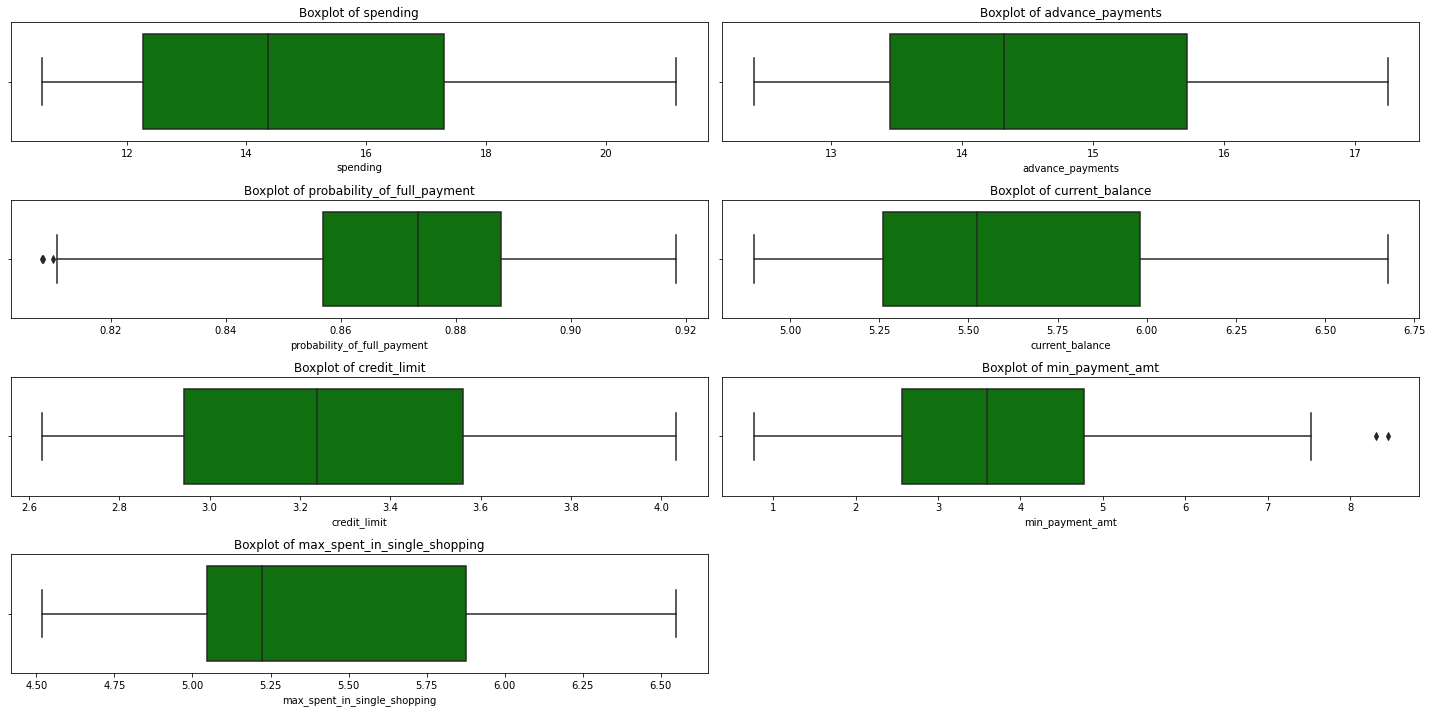

In [7]:
plt.figure(figsize = (20,10))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=df[feature_list[i]], data=df, orient='h', color='g')
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

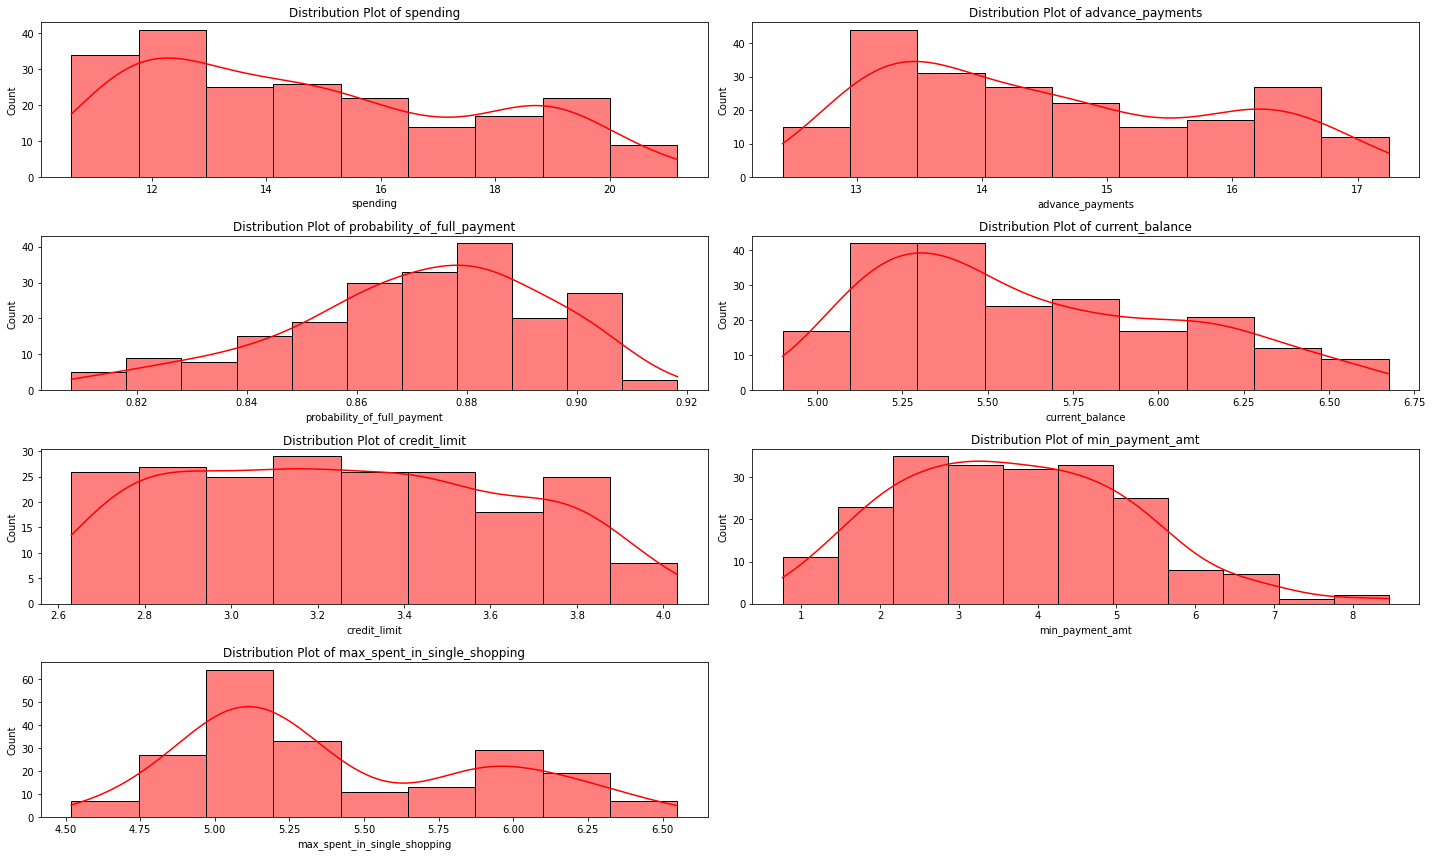

In [8]:
plt.figure(figsize = (20,12))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(4,2,i+1)
    sns.histplot(x=df[feature_list[i]], color='r',kde=True)
    plt.title('Distribution Plot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [9]:
for columns in df.columns:
    print('Skewness of {} is'.format(columns), round(df[columns].skew(),2))
    print('Kurtosis of {} is'.format(columns), round(df[columns].kurt(),2))

Skewness of spending is 0.4
Kurtosis of spending is -1.08
Skewness of advance_payments is 0.39
Kurtosis of advance_payments is -1.11
Skewness of probability_of_full_payment is -0.54
Kurtosis of probability_of_full_payment is -0.14
Skewness of current_balance is 0.53
Kurtosis of current_balance is -0.79
Skewness of credit_limit is 0.13
Kurtosis of credit_limit is -1.1
Skewness of min_payment_amt is 0.4
Kurtosis of min_payment_amt is -0.07
Skewness of max_spent_in_single_shopping is 0.56
Kurtosis of max_spent_in_single_shopping is -0.84


<Figure size 720x720 with 0 Axes>

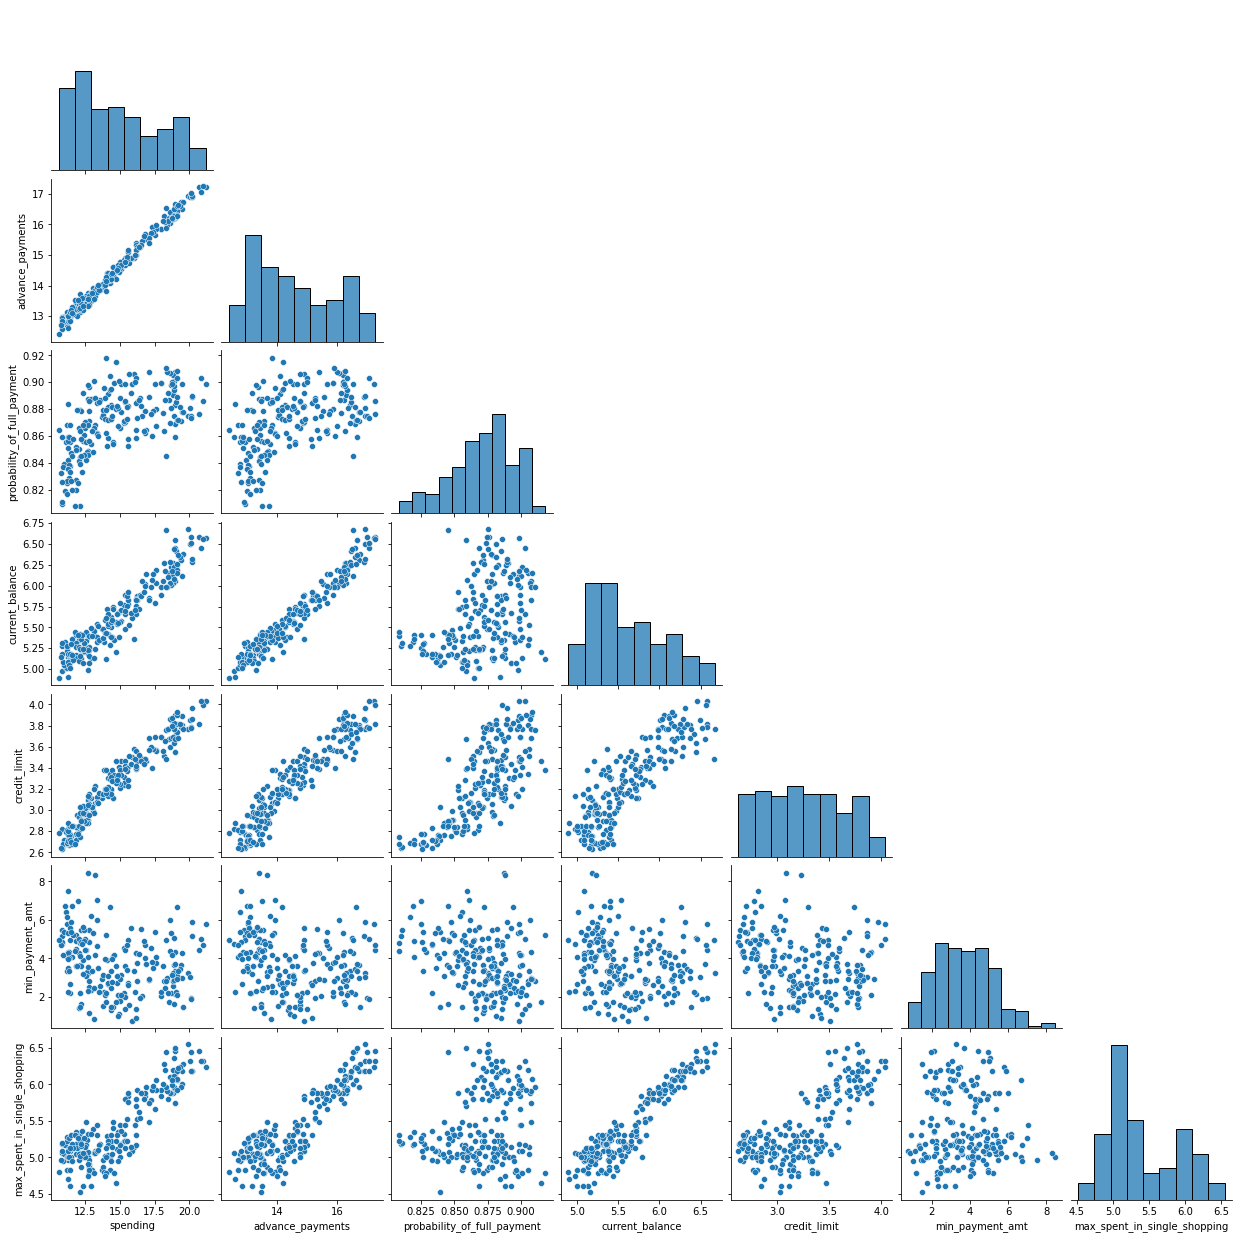

In [10]:
plt.figure(figsize = (10,10))
sns.pairplot(df, corner=True)
plt.show()

In [11]:
corr = df.corr()
corr

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


<AxesSubplot:>

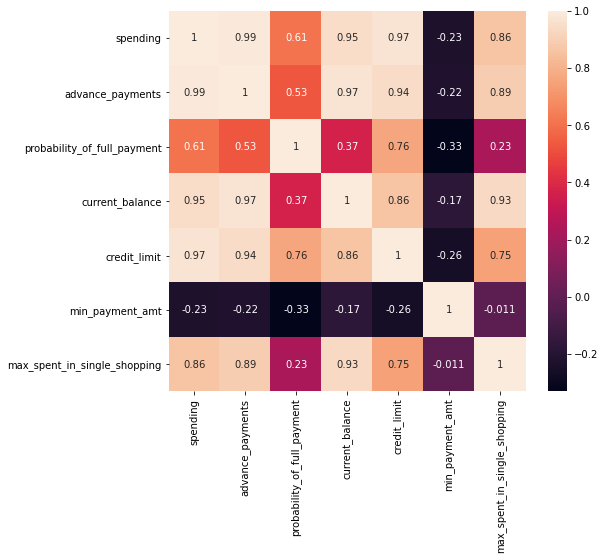

In [12]:
plt.figure(figsize=(8,7))
sns.heatmap(corr, annot=True)

1.2  Do you think scaling is necessary for clustering in this case? Justify

In [13]:
df.var()


spending                        8.466351
advance_payments                1.705528
probability_of_full_payment     0.000558
current_balance                 0.196305
credit_limit                    0.142668
min_payment_amt                 2.260684
max_spent_in_single_shopping    0.241553
dtype: float64

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [15]:
scaled_df = sc.fit_transform(df)
scaled_df

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [16]:
scaled_df = pd.DataFrame(scaled_df, index=df.index, columns=df.columns)

In [17]:
scaled_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage

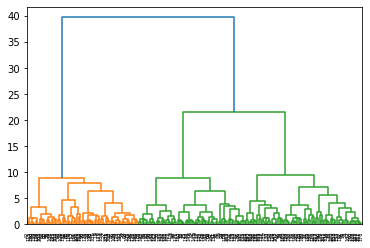

In [22]:
wardlink = linkage(scaled_df, method='ward')
dend = dendrogram(wardlink)

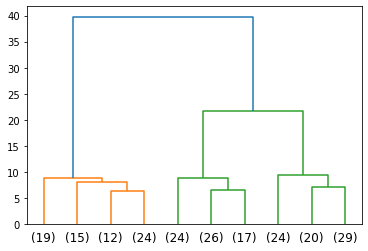

In [23]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )


In [24]:
from scipy.cluster.hierarchy import fcluster

In [25]:
clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [26]:
df['clusters'] = clusters
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


Cluster Profile

In [27]:
clusters = df.iloc[:,0:8].groupby('clusters').mean()
clusters['frequency'] = df.clusters.value_counts().sort_index()
clusters

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,frequency
clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


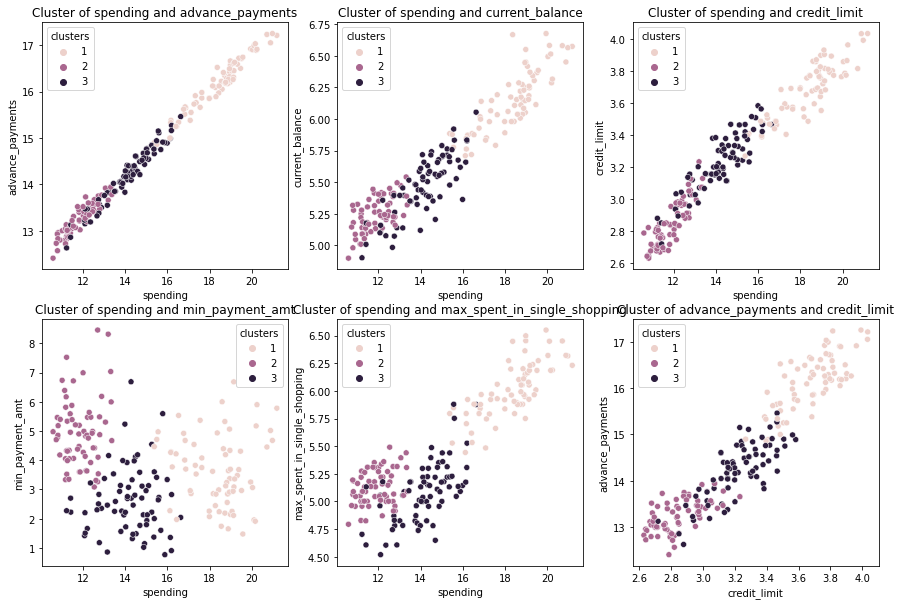

In [28]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.scatterplot(y='advance_payments', x='spending', hue='clusters', data=df)
plt.title('Cluster of spending and advance_payments')

plt.subplot(2,3,2)
sns.scatterplot(y='current_balance', x='spending', hue='clusters', data=df)
plt.title('Cluster of spending and current_balance')

plt.subplot(2,3,3)

sns.scatterplot(y='credit_limit', x='spending', hue='clusters', data=df)
plt.title('Cluster of spending and credit_limit');

plt.subplot(2,3,4)
sns.scatterplot(y='min_payment_amt', x='spending', hue='clusters', data=df)
plt.title('Cluster of spending and min_payment_amt');

plt.subplot(2,3,5)
sns.scatterplot(y='max_spent_in_single_shopping', x='spending', hue='clusters', data=df)
plt.title('Cluster of spending and max_spent_in_single_shopping');

plt.subplot(2,3,6)
sns.scatterplot(y='advance_payments', x='credit_limit', hue='clusters', data=df)
plt.title('Cluster of advance_payments and credit_limit');

1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.


In [29]:
from sklearn.cluster import KMeans


In [30]:
# forming 3 clusters with K = 3
k_means = KMeans(n_clusters=3)

In [31]:
k_means.fit(scaled_df)

KMeans(n_clusters=3)

In [32]:
k_means.labels_

array([1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1,
       1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2,
       1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 1,
       2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2])

In [33]:
k_means.inertia_


430.65897315130064

In [34]:
# Forming clusters with K = 1,3,4,5,6 and comparing the WSS
k_means1 = KMeans(n_clusters = 1)
k_means1.fit(scaled_df)
k_means1.inertia_

1469.9999999999995

In [35]:
k_means2 = KMeans(n_clusters = 2)
k_means2.fit(scaled_df)
k_means2.inertia_

659.1717544870411

In [36]:
k_means3 = KMeans(n_clusters = 3)
k_means3.fit(scaled_df)
k_means3.inertia_

430.65897315130064

In [37]:
k_means4 = KMeans(n_clusters = 4)
k_means4.fit(scaled_df)
k_means4.inertia_

371.746559847914

In [38]:
k_means5 = KMeans(n_clusters = 5)
k_means5.fit(scaled_df)
k_means5.inertia_

328.21750906266806

WSS reduces as K keeps increasing

Calculating WSS for other values of K - Elbow Method


In [39]:
wss = []


In [40]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)


In [41]:
wss

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.38509060801107,
 327.2127816566134,
 289.315995389595,
 262.98186570162267,
 241.8189465608603,
 223.91254221002728,
 206.3961218478669]

In [42]:
a=[1,2,3,4,5,6,7,8,9,10]


C:\Users\Adithya Manivannan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

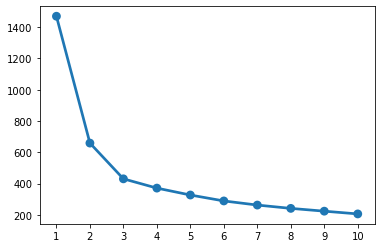

In [43]:
sns.pointplot(a, wss)


In [44]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

Cluster evaluation for 3 clusters: the silhouette score¶


In [45]:
from sklearn.metrics import silhouette_samples, silhouette_score


In [47]:
# Calculating silhouette_score
silhouette_score(scaled_df,labels,random_state=1)

0.40072705527512986

In [48]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [49]:
silhouette_score(scaled_df,labels,random_state=1)


0.3276547677266192

silhouette score is better for 3 clusters than for 4 clusters. So, final clusters will be 3



In [50]:
scaled_df


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813
...,...,...,...,...,...,...,...
205,-0.329866,-0.413929,0.721222,-0.428801,-0.158181,0.190536,-1.366631
206,0.662292,0.814152,-0.305372,0.675253,0.476084,0.813214,0.789153
207,-0.281636,-0.306472,0.364883,-0.431064,-0.152873,-1.322158,-0.830235
208,0.438367,0.338271,1.230277,0.182048,0.600814,-0.953484,0.071238


In [51]:
df_kmeans = scaled_df


In [52]:
df_kmeans['k_clusters'] = k_means3.labels_
df_kmeans.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,k_clusters
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998,2
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582,0
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107,2
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961,1
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813,2


In [53]:
df_kmeans['k_clusters'].value_counts().sort_index()


0    71
1    72
2    67
Name: k_clusters, dtype: int64

In [54]:
aggdata_kmeans = df_kmeans.iloc[:,0:8].groupby('k_clusters').mean()
aggdata_kmeans['frequency'] = df_kmeans.k_clusters.value_counts().sort_index()
aggdata_kmeans

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,frequency
k_clusters,,,,,,,,
0,-0.141119,-0.170043,0.449606,-0.257814,0.001647,-0.661919,-0.585893,71
1,-1.030253,-1.006649,-0.964905,-0.897685,-1.085583,0.694804,-0.624809,72
2,1.256682,1.261966,0.560464,1.237883,1.164852,-0.045219,1.292308,67


END